#### About
Video Classification using Resnet 101 base model in Keras.

Dataset Link - https://www.kaggle.com/datasets/chirag003/video-classification

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import cv2
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import glob
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import load_model
from collections import deque



In [16]:
#os.chdir('/content/drive/MyDrive/Datasets')
#!unzip archive.zip

## Data visualisation

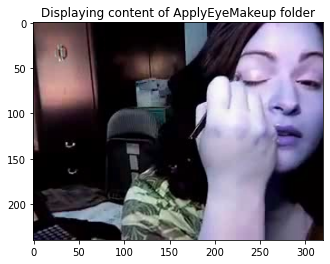

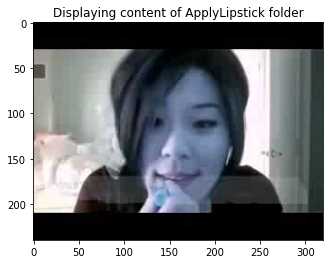

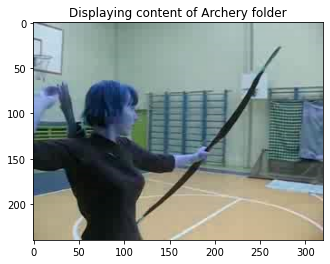

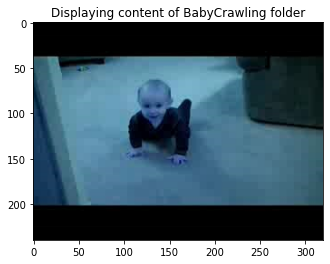

In [17]:
#for train directory
dataset_dir="/content/drive/MyDrive/Datasets/Video Classification/Training/"
display_count=0
for file_path in glob.glob(dataset_dir+"*"):
    display_count+=1
    action = file_path.split("/")[-1]
    
    if display_count!=5:
        for image_name in glob.glob(dataset_dir+action+"/*"):
            img = cv2.imread(image_name)
            plt.imshow(img)
            plt.title("Displaying content of {} folder".format(action))
            plt.show()
            break
    else:
        break 

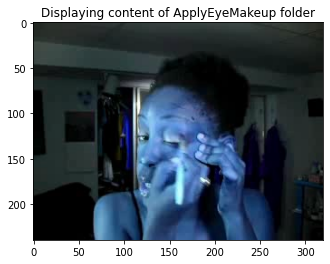

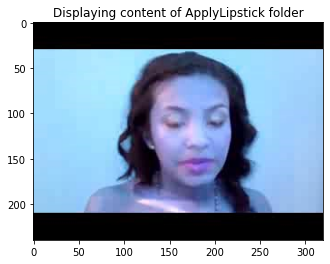

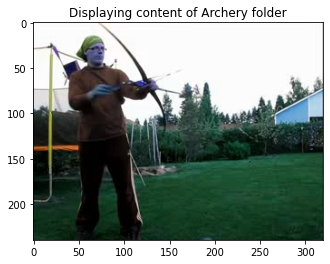

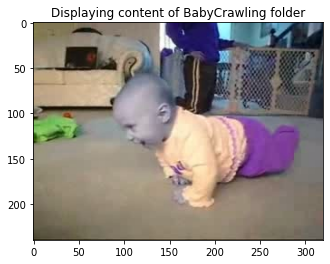

In [18]:
#for test directory
dataset_dir="/content/drive/MyDrive/Datasets/Video Classification/Test/"
display_count=0
for file_path in glob.glob(dataset_dir+"*"):
    display_count+=1
    action = file_path.split("/")[-1]
    if display_count!=5:
        for image_name in glob.glob(dataset_dir+action+"/*"):
            img = cv2.imread(image_name)
            plt.imshow(img)
            plt.title("Displaying content of {} folder".format(action))
            plt.show()
            break
    else:
        break 

In [19]:
#creating data generators from train and test(val,here) directory

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
num_batches=64
train_path="/content/drive/MyDrive/Datasets/Video Classification/Training/"
val_path= "/content/drive/MyDrive/Datasets/Video Classification/Test/"

In [21]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=num_batches,
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(224,224),
    batch_size=num_batches,
    class_mode='categorical'
)

Found 102171 images belonging to 102 classes.
Found 18803 images belonging to 102 classes.


In [22]:
for batch in train_generator:
    print("Image shape -{}, Label shape-{}".format(batch[0].shape,batch[1].shape))
    break

Image shape -(64, 224, 224, 3), Label shape-(64, 102)


In [23]:
for batch in val_generator:
    print("Image shape -{}, Label shape-{}".format(batch[0].shape,batch[1].shape))
    break

Image shape -(64, 224, 224, 3), Label shape-(64, 102)


## Model Architecture

In [24]:
base_model = ResNet101(weights='imagenet',include_top=False, input_tensor=Input(shape=(224,224,3)))

In [25]:
num_classes=102
#training the head model
head_model = base_model.output
head_model = AveragePooling2D(pool_size=(7,7))(head_model)
head_model = Flatten()(head_model)
head_model = Dense(512,activation='relu')(head_model)
head_model = Dropout(0.2)(head_model)
head_model= Dense(num_classes,activation='softmax')(head_model)
model = Model(inputs=base_model.input,outputs=head_model)

#freezing base_model layers
for base_model_layers in base_model.layers:
    base_model_layers.trainable=False


In [26]:
opt = Adam(lr=0.01)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [27]:
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [28]:
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=["accuracy"])

In [29]:
History = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // num_batches,
    validation_data = val_generator, 
    validation_steps = val_generator.samples // num_batches,callbacks=callbacks_list,
    epochs = 10)

Epoch 1/10
1596/1596 [==============================] - ETA: 0s - loss: 4.4773 - accuracy: 0.0316
Epoch 1: val_accuracy improved from -inf to 0.03370, saving model to weights-improvement-01-0.03.hdf5
1596/1596 [==============================] - 1519s 947ms/step - loss: 4.4773 - accuracy: 0.0316 - val_loss: 4.3918 - val_accuracy: 0.0337
Epoch 2/10
1596/1596 [==============================] - ETA: 0s - loss: 4.4470 - accuracy: 0.0319
Epoch 2: val_accuracy improved from 0.03370 to 0.04549, saving model to weights-improvement-02-0.05.hdf5
1596/1596 [==============================] - 1496s 938ms/step - loss: 4.4470 - accuracy: 0.0319 - val_loss: 4.3823 - val_accuracy: 0.0455
Epoch 3/10
1596/1596 [==============================] - ETA: 0s - loss: 4.4422 - accuracy: 0.0318
Epoch 3: val_accuracy did not improve from 0.04549
1596/1596 [==============================] - 1487s 932ms/step - loss: 4.4422 - accuracy: 0.0318 - val_loss: 4.3865 - val_accuracy: 0.0440
Epoch 4/10
 432/1596 [=======>....

KeyboardInterrupt: ignored

## Inference of the trained model...


In [32]:
model = load_model('videoplayback.mp4')

In [34]:
labels = train_generator.class_indices

In [42]:
labels.values()

dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101])

In [45]:
class_mappings = {v: k for k, v in labels.items()}
class_mappings[84]


'SoccerJuggling'

In [48]:
#taking input video and writing an output video
cap = cv2.VideoCapture('videoplayback.mp4')
writer = None
W,H = (None,None)
Prediction = deque(maxlen=256)
while True:
  ret,frame = cap.read()
  if not ret:
    break
  if W is None or H is None:
    (W,H) = frame.shape[:2]
  
  output = frame.copy()
  frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
  frame = cv2.resize(frame,(224,224)).astype("float32")
  prediction = model.predict(np.expand_dims(frame,axis=0))[0]
  Prediction.append(prediction)
  result = np.array(Prediction).mean(axis=0)
  i = np.argmax(result)
  label = class_mappings[i]
  text = "Action's Class- {} Detected".format(label)
  cv2.putText(output,text,(40,50), cv2.FONT_HERSHEY_SIMPLEX,1.25,(255,0,0),5)
  if writer is None:
    fourcc = cv2.VideoWriter_fourcc(*'MJPG') 
    writer = cv2.VideoWriter('output_video.mp4',fourcc,30,(W,H),True)
  writer.write(output)

print("output video written")
writer.release()
cap.release()

1/1 [==============================] - 0s 25ms/step
output video written


## End Remarks.
For better accuracy,
1. Train longer.
2. Try various other base networks and tweak the head accordingly.
3. Apply mean,std to all images as a transform while training.